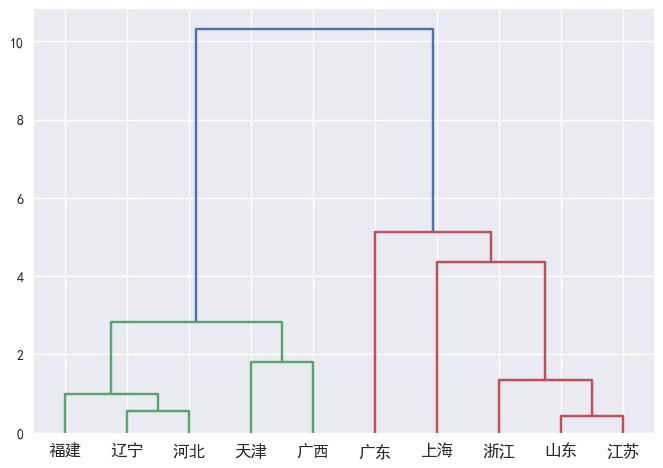

In [26]:
# 层次聚类
import scipy.cluster.hierarchy as sch
#计算点-点距离 生成欧式距离矩阵"euclidean"
dis_mat=sch.distance.pdist(fa_city[[0,1]],metric="euclidean")
#计算类-类之间的距离,"ward"最小方差法?
Z=sch.linkage(dis_mat,method="ward")
#将层次聚类结果层次聚类图
P=sch.dendrogram(Z,labels=fa_city["AREA"].tolist())
plt.savefig("层次聚类图20230318.png")

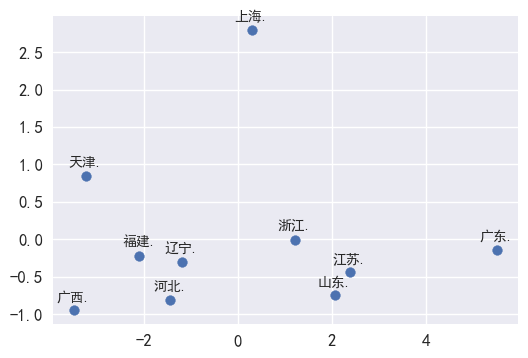

In [28]:
#画图
x=pca_city[0]
y=pca_city[1]
labels=pca_city["AREA"]
scatter(x,y,labels)

In [27]:
#画图 先人眼看看这几类城市划分几个类
# plt.rcParams['font.family'] = 'Heiti TC'#'SimHei' #'Heiti TC'
# from pylab import mpl
# mpl.rcParams['axes.unicode_minus'] = False

def scatter(x, y, labels, **kw):

    plt.figure(figsize=(6, 4))
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.scatter(x, y)
    for xx, yy, label in zip(x, y, labels):
        plt.text(xx, yy+0.1, '%s.' % label,
                 ha='center', va='bottom', **kw)

In [20]:
pca_city = df.join(score_pca)
fa_city = df.join(score_fa)
pca_city.head()
fa_city.head()

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,0,1
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.189451,-0.310922
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.064157,-0.748544
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.437690,-0.806697
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.230397,0.845198
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.368927,-0.444810


,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,0,1
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.174241,-0.364178
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.095775,-0.654819
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.399899,-0.870629
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.265185,0.698849
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.386557,-0.337666


In [19]:
# 对比结果
score_pca.sort_values([0,1],ascending=False)
score_fa.sort_values([0,1],ascending=False)

,0,1
8,5.500912,-0.142758
4,2.368927,-0.444810
1,2.064157,-0.748544
6,1.209952,-0.006385
5,0.289972,2.792668
0,-1.189451,-0.310922
2,-1.437690,-0.806697
7,-2.096895,-0.227964
3,-3.230397,0.845198
9,-3.479486,-0.949785


,0,1
8,5.501759,0.105138
4,2.386557,-0.337666
1,2.095775,-0.654819
6,1.209012,0.048116
5,0.163901,2.802894
0,-1.174241,-0.364178
2,-1.399899,-0.870629
7,-2.084500,-0.322173
3,-3.265185,0.698849
9,-3.433179,-1.105531


In [16]:
# 得分
score_fa = pd.DataFrame(fa.get_component_scores(st_data))

In [15]:
#设定提取主成分的方式 使用top_n
fa.find_comps_to_retain(method="top_n",num_keep=2)
#最大方差法对因子进行旋转
fa.rotate_components(method="varimax")
# 查看因子权重 ，因子的载荷矩阵
pd.DataFrame(fa.comps['rot'])

array([0, 1], dtype=int64)

,0,1
0,0.362880,-0.196047
1,-0.001947,0.943648
2,0.364222,0.006565
3,0.369255,-0.028775
4,0.361258,0.111596
5,0.352799,-0.007144
6,0.370140,-0.118691
7,0.295099,0.061400
8,0.346765,0.199650


In [12]:
# 因子分析
from fa_kit import FactorAnalysis
#实例化 对输入数据进行主成分的提取
fa=FactorAnalysis.load_data_samples(
    st_data,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()

In [13]:
# 计算得分
score_pca = pd.DataFrame(pca.fit_transform(st_data))

In [11]:
pca.explained_variance_
pca.explained_variance_ratio_

array([8.01129553, 1.22149318])

array([0.80112955, 0.12214932])

In [10]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(st_data)

PCA(n_components=2)

In [8]:
# 数据标准化
from sklearn import preprocessing
st_data = preprocessing.scale(model_data)
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler_model_data=scaler.fit_transform(model_data)

In [7]:
#查看相关系数
model_data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,-0.094292,0.966506,0.979238,0.922984,0.921680,0.941148,0.637458,0.825568
X2,-0.094292,1.000000,0.112726,0.074167,0.214052,0.093483,-0.042776,0.081195,0.273145
X3,0.966506,0.112726,1.000000,0.985373,0.963159,0.939194,0.935196,0.704714,0.898016
X4,0.979238,0.074167,0.985373,1.000000,0.972862,0.939720,0.962267,0.713890,0.913364
X5,0.922984,0.214052,0.963159,0.972862,1.000000,0.971337,0.937109,0.716722,0.934549
X6,0.921680,0.093483,0.939194,0.939720,0.971337,1.000000,0.897127,0.624294,0.848004
X7,0.941148,-0.042776,0.935196,0.962267,0.937109,0.897127,1.000000,0.836272,0.928692
X8,0.637458,0.081195,0.704714,0.713890,0.716722,0.624294,0.836272,1.000000,0.881528
X9,0.825568,0.273145,0.898016,0.913364,0.934549,0.848004,0.928692,0.881528,1.000000


In [6]:
#获取要用的特征
model_data=df.loc[:,"X1":]

In [5]:
#读取数据
df=pd.read_csv("cities_10.csv",encoding="gbk")
df.head()

,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模\连续变量降维')